In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from Maze_small import Maze

In [49]:
env = Maze()
env.reset()

[0, 0]

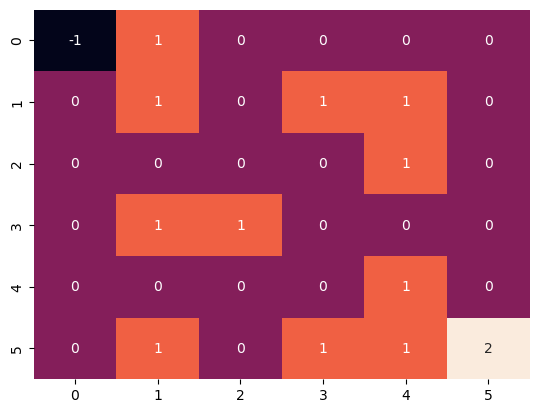

In [50]:
env.plot()

In [27]:
Q = np.zeros((6, 6, 4))

In [28]:
def policy(state, epsilon = 0.):
    if np.random.uniform(0, 1) < epsilon:
        return np.random.randint(4)
    else:
        state = tuple(state)
        action_value = Q[state]
        return np.random.choice(np.flatnonzero(action_value == action_value.max()))

In [57]:
def n_step_sarsa(action_values, policy, episodes, alpha=0.1,
                 gamma=0.99, epsilon=0.2, n=8):

    for episode in range(1, episodes + 1):
        state = env.reset()
        action = policy(state, epsilon)
        transitions = []
        done = False
        t = 0

        while t-n < len(transitions):

            if not done:
                next_state, reward, done = env.step(action)
                next_action = policy(next_state, epsilon)
                transitions.append([state, action, reward])

            if t >= n:
                next_state = tuple(next_state)
                G = (1 - done) * action_values[next_state][next_action]
                for state_t, action_t, reward_t in reversed(transitions[t-n:]):
                    G = reward_t + gamma * G
                state_t = tuple(state_t)
                action_values[state_t][action_t] += alpha * (G - action_values[state_t][action_t])

            t += 1
            state = next_state
            action = next_action


In [58]:
n_step_sarsa(Q, policy, 1000)

<Axes: >

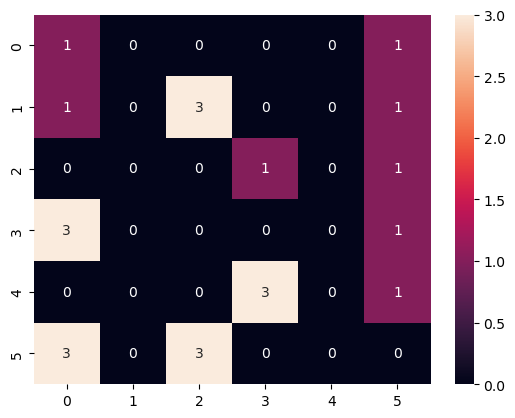

In [59]:
sns.heatmap(np.argmax(Q, axis = 2), annot=True)

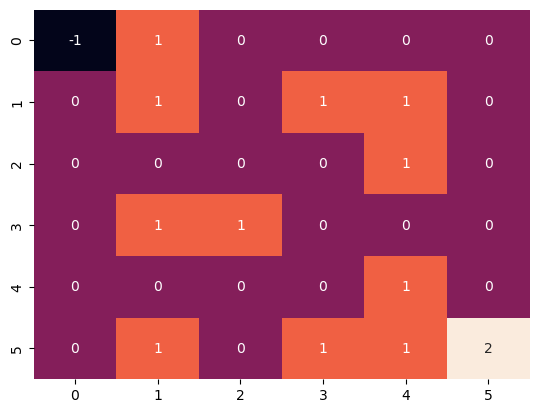

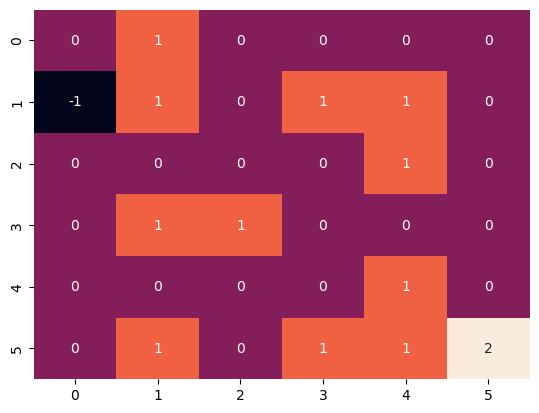

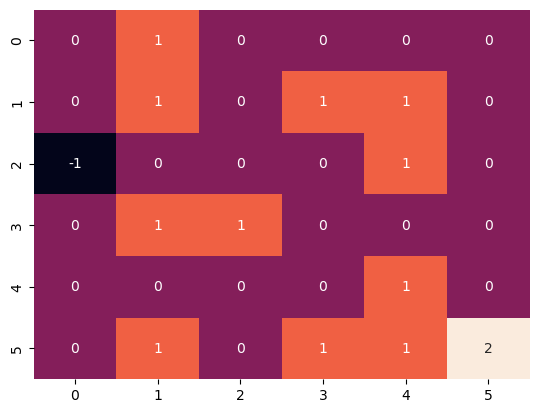

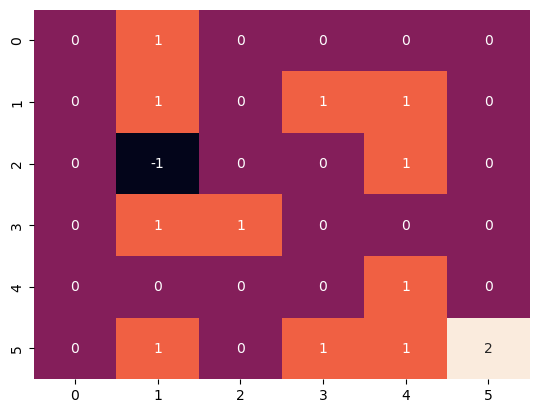

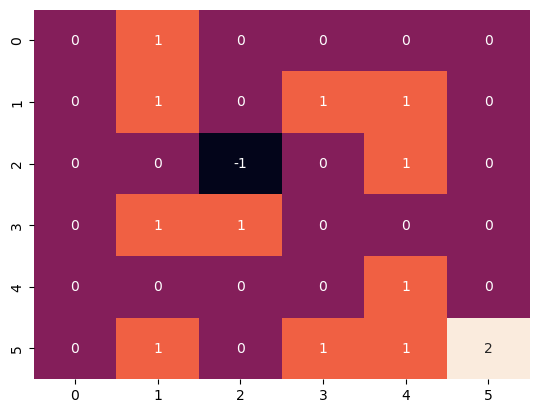

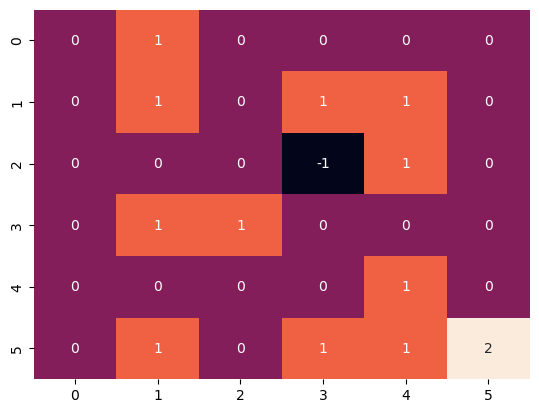

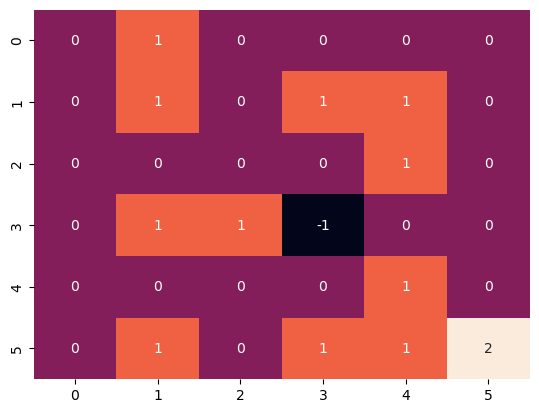

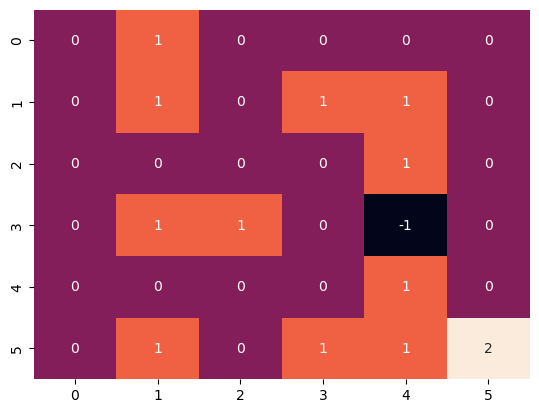

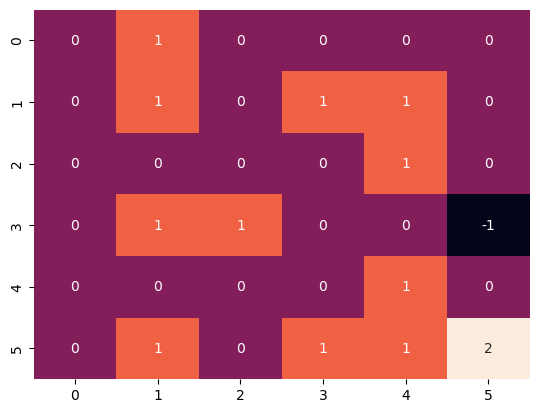

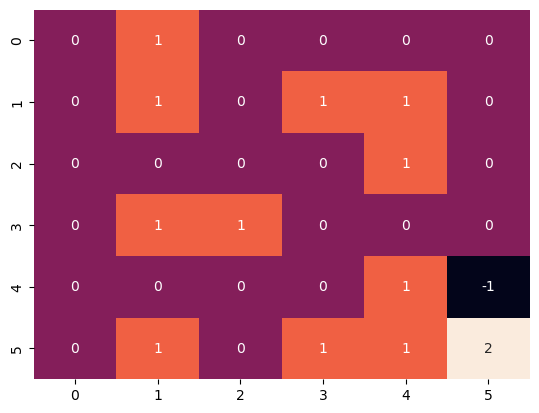

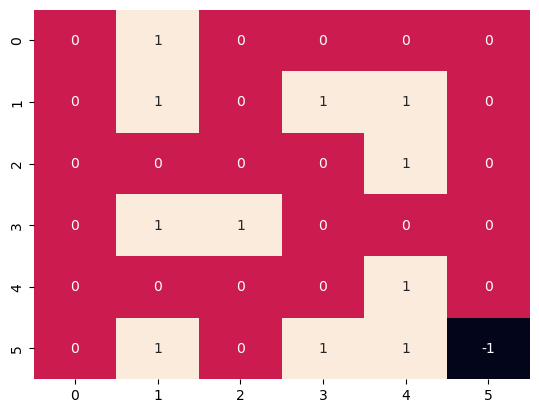

In [61]:
env.reset()
done = False

while done == False:
    env.plot()
    action = np.argmax(Q[env.current_pos[0], env.current_pos[1]])
    _, _, done = env.step(action)
    
env.plot()